In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('movies_dataset.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [3]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [4]:
import matplotlib.pyplot as plt

In [5]:
df['YEAR'].value_counts()

(2020– )           892
(2021– )           658
-2020              639
(2019– )           549
-2019              544
                  ... 
(1999– )             1
(I) (2013–2016)      1
(2002–2005)          1
(2010–2015)          1
(1985– )             1
Name: YEAR, Length: 438, dtype: int64

In [6]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,-2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","8,85,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","4,14,849",23.0,NaN
4,Army of Thieves,-2021,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [7]:
# Removing \n from all columns
for col in ['GENRE', 'ONE-LINE', 'STARS']:
    df[col] = df[col].str.replace('\n',' ').str.strip()
    
df.head(20)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,-2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director: Peter Thorwarth | Stars: Peri B...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars: Chris Wood, Sarah Michelle Gellar, Le...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars: Andrew Lincoln, Norman Reedus, Meliss...","8,85,805",44.0,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars: Justin Roiland, Chris Parnell, Spence...","4,14,849",23.0,NaN
4,Army of Thieves,-2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director: Matthias Schweighöfer | Stars: ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Stars: Chase Stokes, Madelyn Cline, Madison ...","25,858",50.0,NaN
6,The Last Letter from Your Lover,-2021,"Drama, Romance",6.8,A pair of interwoven stories set in the past a...,Director: Augustine Frizzell | Stars: Sha...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"Crime, Drama, Mystery",8.6,"By day, mild-mannered Dexter is a blood-spatte...","Stars: Michael C. Hall, Jennifer Carpenter, ...","6,65,387",53.0,NaN
8,Never Have I Ever,(2020– ),Comedy,7.9,The complicated life of a modern-day first gen...,"Stars: Maitreyi Ramakrishnan, Poorna Jagannat...","34,530",30.0,NaN
9,Virgin River,(2019– ),"Drama, Romance",7.4,"Seeking a fresh start, nurse practitioner Meli...","Stars: Alexandra Breckenridge, Martin Henders...","27,279",44.0,NaN


In [8]:
# function for Splitting names of stars and directors
def extract_direc (direc):
    if 'Director' in direc or 'Directors' in direc:
        director = direc.split('|')[0]
        return director.split(':')[1]
    else :
        return np.nan
    
def extract_stars(stars):
    if 'Star' not in stars or 'Stars' not in stars:
        return np.nan
    else:
        return stars.split(':')[-1]
    
    
df['Director'] = df['STARS'].apply(lambda x : extract_direc(x))
df['Stars'] = df['STARS'].apply(lambda y : extract_stars(y))

df.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,-2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director: Peter Thorwarth | Stars: Peri B...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars: Chris Wood, Sarah Michelle Gellar, Le...","17,870",25.0,NaN,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Hea..."
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars: Andrew Lincoln, Norman Reedus, Meliss...","8,85,805",44.0,NaN,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBr..."
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars: Justin Roiland, Chris Parnell, Spence...","4,14,849",23.0,NaN,NaN,"Justin Roiland, Chris Parnell, Spencer Gram..."
4,Army of Thieves,-2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director: Matthias Schweighöfer | Stars: ...,NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, R..."


Extracting years

In [22]:
df['YEAR'] = df['YEAR'].str.extract(r'([0-9]{4}–.*|[0-9]{4})')

In [23]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director: Peter Thorwarth | Stars: Peri B...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander..."
1,Masters of the Universe: Revelation,2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars: Chris Wood, Sarah Michelle Gellar, Le...","17,870",25.0,NaN,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Hea..."
2,The Walking Dead,2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars: Andrew Lincoln, Norman Reedus, Meliss...","8,85,805",44.0,NaN,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBr..."
3,Rick and Morty,2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars: Justin Roiland, Chris Parnell, Spence...","4,14,849",23.0,NaN,NaN,"Justin Roiland, Chris Parnell, Spencer Gram..."
4,Army of Thieves,2021,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director: Matthias Schweighöfer | Stars: ...,NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, R..."


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '2020– )'),
  Text(1, 0, '2020'),
  Text(2, 0, '2021– )'),
  Text(3, 0, '2019'),
  Text(4, 0, '2019– )'),
  Text(5, 0, '2018'),
  Text(6, 0, '2017'),
  Text(7, 0, '2021'),
  Text(8, 0, '2016'),
  Text(9, 0, '2018– )'),
  Text(10, 0, '2015'),
  Text(11, 0, '2014'),
  Text(12, 0, '2013'),
  Text(13, 0, '2017– )'),
  Text(14, 0, '2019–2020)'),
  Text(15, 0, '2018–2020)'),
  Text(16, 0, '2012'),
  Text(17, 0, '2022– )'),
  Text(18, 0, '2011'),
  Text(19, 0, '2016– )')])

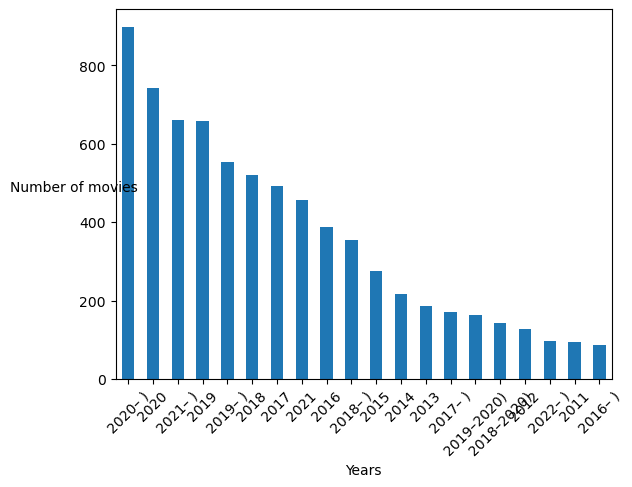

In [26]:
df['YEAR'].value_counts()[:20].plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Number of movies', rotation = 0)
plt.xticks(rotation = 45)

In [27]:
df['RATING'].isnull().value_counts()

False    8179
True     1820
Name: RATING, dtype: int64

In [28]:
bins=  np.linspace(min(df['RATING']), max(df['RATING']),5)
bin_names = ['Low', 'Avg', 'Above AVg', 'High']

In [29]:
df['Rating_binned'] = pd.cut(df['RATING'], bins, labels= bin_names, include_lowest= True)
df[['RATING','Rating_binned']]

,RATING,Rating_binned
0,6.1,Above AVg
1,5.0,Avg
2,8.2,High
3,9.2,High
4,NaN,NaN
...,...,...
9994,NaN,NaN
9995,NaN,NaN
9996,NaN,NaN
9997,NaN,NaN


<BarContainer object of 4 artists>

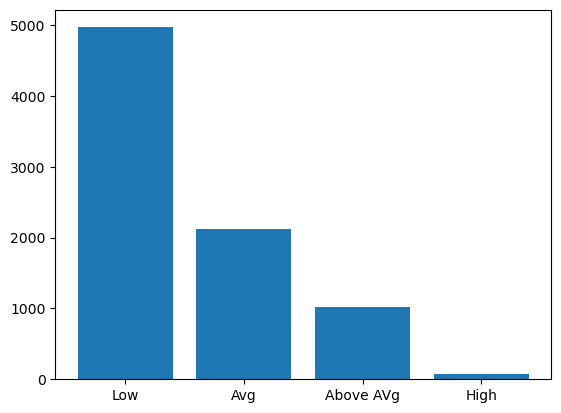

In [32]:
plt.bar(bin_names, df['Rating_binned'].value_counts())